In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Implement an End to End CNN Model for Image Classification Task.

# Task 1: Data Understanding and Visualization:

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

  • Get the list of class directories from the train folder.

  • Select one image randomly from each class.
  
  • Display the images in a grid format with two rows using matplotlib.

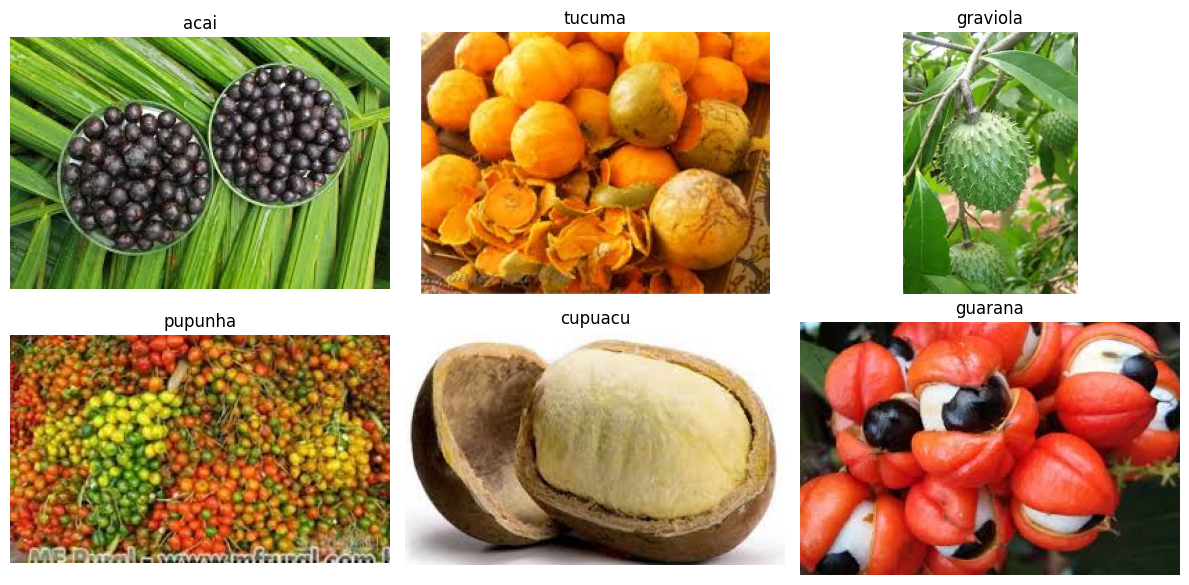

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the training dataset
train_dir = '/content/drive/MyDrive/Colab Notebooks/FruitinAmazon/FruitinAmazon/train'  # Replace with the actual path if different

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
class_labels = []

for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if images:
        random_image = random.choice(images)
        selected_images.append(os.path.join(class_path, random_image))
        class_labels.append(class_dir)

# Determine grid size (2 rows)
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Ensure two rows
rows = 2

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for idx, (image_path, label) in enumerate(zip(selected_images, class_labels)):
    img = Image.open(image_path)
    ax = axes[idx // cols, idx % cols]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

# Remove empty subplots if any
for idx in range(len(selected_images), rows * cols):
    fig.delaxes(axes[idx // cols, idx % cols])

plt.tight_layout()
plt.show()



• What did you Observe?


  When visualizing the images, i observed that each class has a distinct image, confirming that the dataset is well-structured. Some images appear larger or smaller, lighting conditions diffre across images, and fruits appear against various backgrounds. These variations mean that our image recognition model will need to be flexible enough to identify fruits correctly regardless of these differences.

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”


In [11]:
import os
from PIL import Image

# Define the path to the training dataset
train_dir = '/content/drive/MyDrive/Colab Notebooks/FruitinAmazon/FruitinAmazon/train'  # Replace with the actual path if different

# List all class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

corrupted_images = []  # List to store corrupted image paths

# Iterate through each class subdirectory
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)

    # List all image files in the directory
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image in images:
        image_path = os.path.join(class_path, image)

        try:
            # Attempt to open and verify the image
            with Image.open(image_path) as img:
                img.verify()  # Verify the image integrity

        except (IOError, SyntaxError):
            # If an error occurs, consider it a corrupted image
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Final report
if not corrupted_images:
    print("No Corrupted Images Found.")

No Corrupted Images Found.


# Task 2: Loading and Preprocessing Image Data in keras:

In [12]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset="training",
  seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=False,
  validation_split=validation_split,
  subset="validation",
  seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:


Convolutional Architecture:

• Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

• Activation Layer: ReLU activation

• Pooling Layer 1: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

• Convolutional Layer 2:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

• Activation Layer: ReLU activation

• Pooling Layer 2: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

Fully Connected Network Architecture:

• Flatten Layer: Flatten the input coming from the convolutional layers

• Input Layer:

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:

– Number of Neurons: num classes (number of output classes)

In [13]:
import numpy as np

# If using tf.data.Dataset
unique_labels = set()
for _, labels in train_ds:
    unique_labels.update(np.unique(labels.numpy()))
print("Unique labels:", unique_labels)
print("Number of classes:", len(unique_labels))

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
Number of classes: 6


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to create the CNN model
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Convolutional Layer 2
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Flatten layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),

        # Output Layer (Softmax for multi-class classification)
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

# Define parameters
input_shape = (128, 128, 3)  # Example input shape (128x128 RGB images)
num_classes = 6  # Adjust based on dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model
Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [15]:
# Compile the model
model.compile(
    optimizer="adam",  # Adam optimizer
    loss="sparse_categorical_crossentropy",  # Loss function for multi-class classification
    metrics=["accuracy"]  # Evaluate model performance
)

print("Model compiled successfully!")

Model compiled successfully!


# Task 4: Train the Model
Model Training

• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [16]:
# Callbacks
checkpoint = ModelCheckpoint(
    "best_model.h5",  # Save the best model based on validation accuracy
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode="max",  # We want to maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore the best model weights after stopping
    verbose=1
)

# Combine callbacks
callbacks = [checkpoint, early_stopping]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

NameError: name 'ModelCheckpoint' is not defined

# Task 5: Evaluate the Model
Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [17]:
# Evaluate the model on the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/FruitinAmazon/FruitinAmazon/test',  # specify the path to your test directory
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=batch_size
)

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.1000 - loss: 28.3458
Test Loss: 28.345767974853516
Test Accuracy: 0.10000000149011612


# Task 6: Save and Load the Model
Model Saving and Loading

• Save the trained model to an .h5 file using model.save().
• Load the saved model and re-evaluate its performance on the test set.

In [18]:
model.save('final_model.h5')

In [19]:
loaded_model = tf.keras.models.load_model('final_model.h5')

In [20]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - accuracy: 0.1000 - loss: 28.3458
Test Accuracy: 0.1000


In [21]:
# Re-evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_ds)
print(f"Loaded Model - Test Loss: {test_loss}")
print(f"Loaded Model - Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.1000 - loss: 28.3458
Loaded Model - Test Loss: 28.345767974853516
Loaded Model - Test Accuracy: 0.10000000149011612


# Task 7: Predictions and Classification Report
Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

• Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [22]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test dataset
predictions = model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

# Convert the true labels into a numpy array
true_labels = np.array(true_labels)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.20      0.22         5
           2       0.13      0.40      0.20         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.18      0.40      0.25         5

    accuracy                           0.17        30
   macro avg       0.09      0.17      0.11        30
weighted avg       0.09      0.17      0.11        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
import os

# List files in the current directory
print(os.listdir())

['.config', 'drive', 'final_model.h5', 'sample_data']


In [24]:
import shutil

# Move the model to a new directory
shutil.move("final_model.h5","/content/drive/MyDrive/AI&ML")

'/content/drive/MyDrive/AI&ML/final_model.h5'